### Name: Amir Hosein Haji Mohammad Rezaie

### Std ID: 99109252

# Gradient Descent in Numerical Computation

## Introduction
Gradient descent is an optimization algorithm used to minimize functions by iteratively moving towards the steepest descent, as defined by the negative of the gradient. It is widely used in machine learning and deep learning for optimizing cost functions.

## Mathematical Background
### Gradient Descent Algorithm
The gradient descent algorithm updates the parameters $\theta$ of a function to minimize the cost function $J(\theta)$:

$\theta := \theta - \alpha \nabla J(\theta)$
where:
- $\alpha$ is the learning rate
- $\nabla J(\theta)$ is the gradient of the cost function with respect to $\theta$


## In this notebook :
In this notebook, in the first section, first we create some data points. then, we want to fit a regression line to this points using gradient descent. at the end, we visualize the regression lines that we find through gradient descent updates.
In the secons section, we analyze that does gradient descent always converge to optimal solution or not.

## Create Data
Generate some data with y = $\theta_1*x + \theta_2$

$\theta_1 = 3$

$\theta_2 = 4$


Add some Gaussian noise to the data and plot the points and the main line

Text(0.5, 1.0, 'y = 3x + 4 with noise')

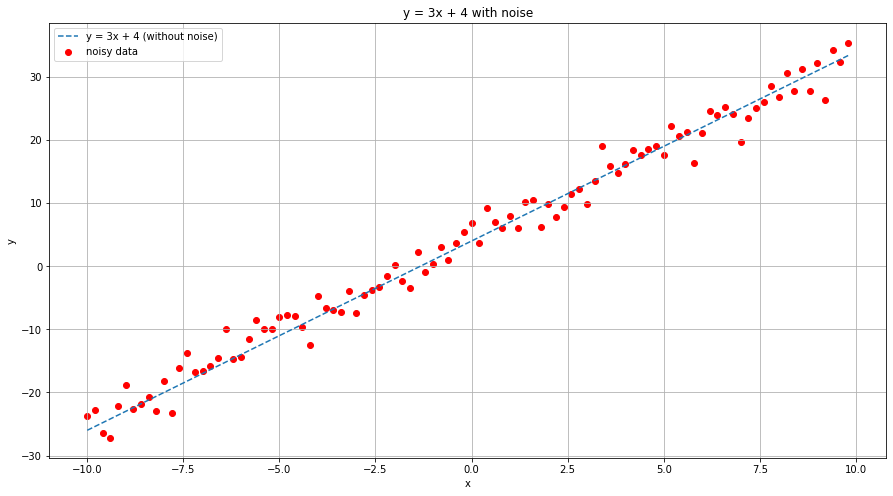

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# Generate range of x and y values with adding some noise
X = np.arange(-10, 10, 0.2)
y_orig = []

for x in X:
    y_orig.append(3 * x + 4)

y_orig = np.array(y_orig)
y_noise = y_orig + np.random.normal(0, 2, len(X))

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(X, y_orig, linestyle = 'dashed', label = 'y = 3x + 4 (without noise)')
plt.scatter(X, y_noise, marker = 'o', color = 'red', label = 'noisy data')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('y')
plt.xlabel('x')
plt.title('y = 3x + 4 with noise')

implement gradient_descent and compute_cost functions. note that x and y are values of x's and y's points(noisy points), slope and intercept are the values of regression line that we are trying to find and fit to the data.
compute_cost function is a simple function to calculate the error or cost of the predicted value and main value.

In [24]:
# Function to compute gradients and update parameters
def gradient_descent(x, y, slope, intercept, learning_rate):
    'x and y are values that we give to function'
    'slope and intercept of the regression line would be given to function'
    'in order to use gradient descent and upate them'
    'at last we return updated slope and intercept'
    
    grad_slope = np.sum(-2 * (y - slope * x - intercept) * x)
    grad_intercept = np.sum(-2 * (y - slope * x - intercept))

    slope -= learning_rate * grad_slope
    intercept -= learning_rate * grad_intercept
    return slope, intercept

# Function to compute cost
def compute_cost(x, y, slope, intercept):
    'with the real y value and predicted y value return the cost of function'
    cost = np.sum((y - slope * x - intercept) ** 2)
    return cost

In this cell, for the num_iterations, do gradient descent algorithm and save slope and intercepts, also compute costs and save them to.

In [25]:
# Initialize parameters (slope and intercept)
slope = 2
intercept = 2

# Set hyperparameters
learning_rate = 10**-4 ##TODO
num_iterations = 100 ##TODO



# Lists to store parameters and costs at each iteration
slope_history = []
intercept_history = []
cost_history = []

# Perform gradient descent
for i in range(num_iterations):
    'perform gradient descent and keep slopes and intecepts and costs in each iteration'
    slope_history.append(slope)
    intercept_history.append(intercept)
    cost_history.append(compute_cost(X, y_noise, slope, intercept))
    slope, intercept = gradient_descent(X, y_noise, slope, intercept, learning_rate)



Now, plot the regression lines with the saved slope and intercepts all in 1 plot and visualize them.

Text(0.5, 1.0, 'y = 3x + 4 with noise')

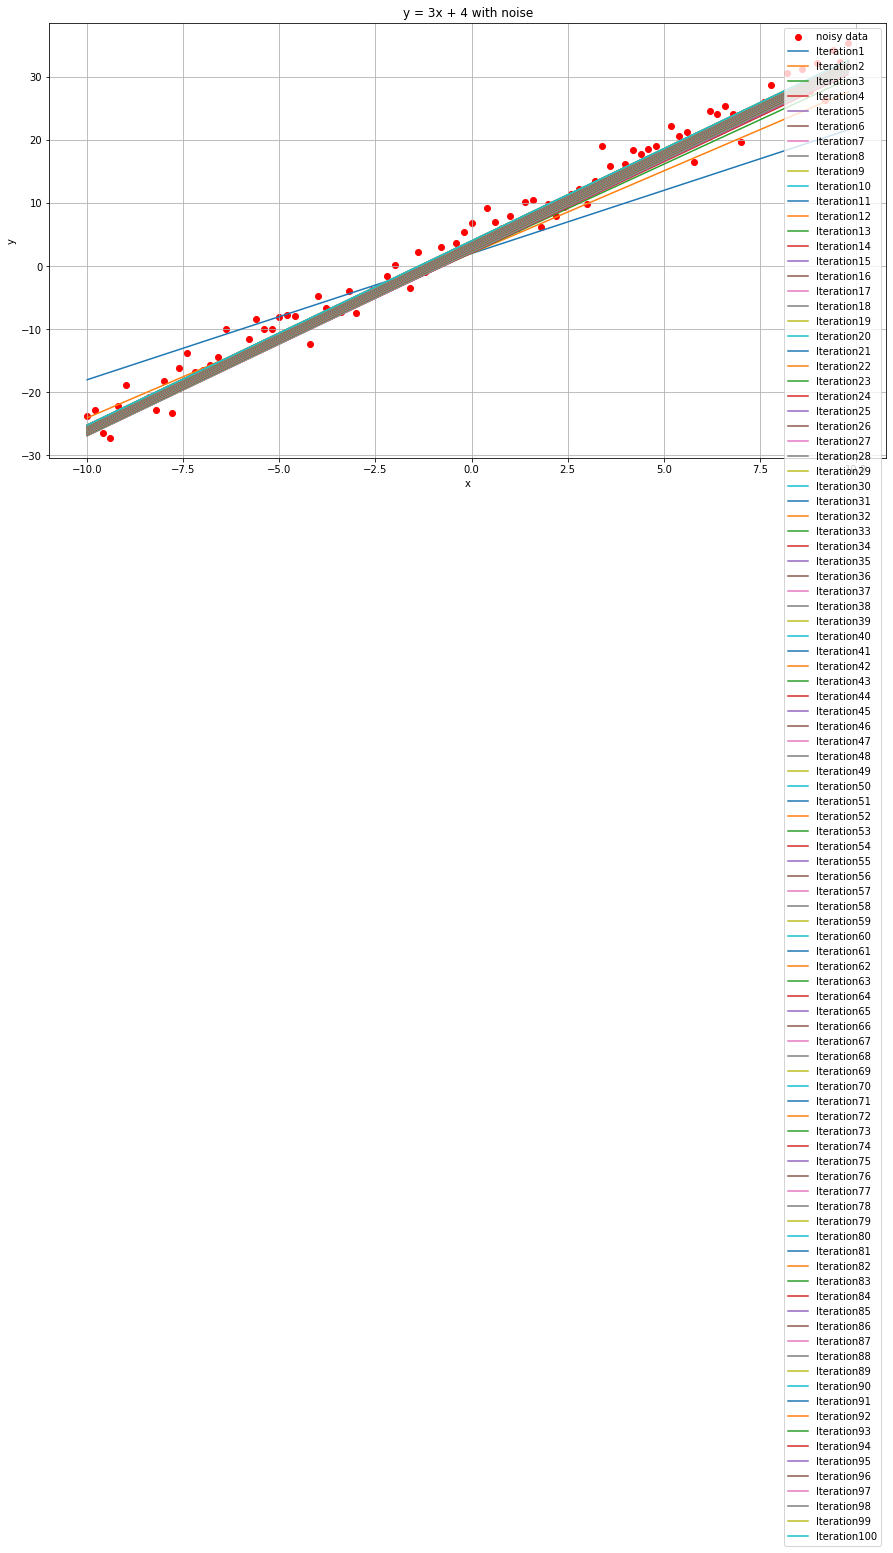

In [26]:
plt.figure(figsize=(15, 8))
plt.scatter(X, y_noise, marker = 'o', color = 'red', label = 'noisy data')
for i in range(num_iterations):
    plt.plot(X, slope_history[i] * X + intercept_history[i], label = f'Iteration{i + 1}')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('y')
plt.xlabel('x')
plt.title('y = 3x + 4 with noise')

Now plot the costs against iterations.

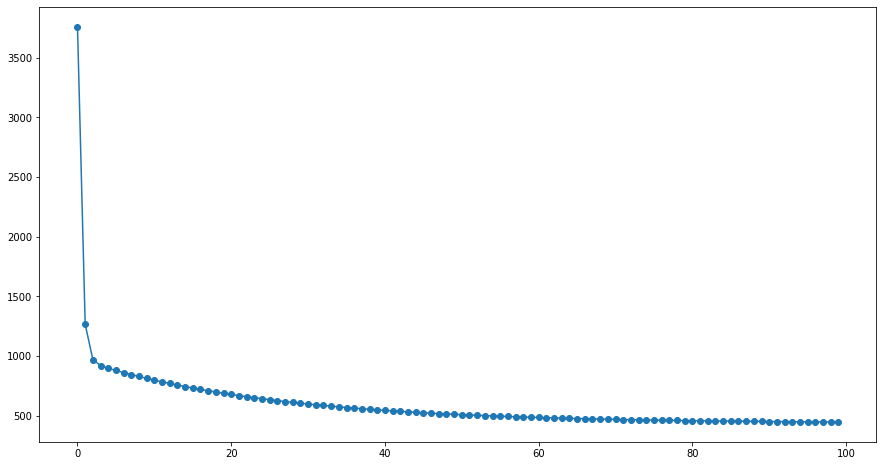

In [27]:
# Plot costs against iterations

fig = plt.figure(figsize = (15, 8))
plt.plot(cost_history, marker = 'o')

## Section 2:
In this section, we define a function that has some local minimas. then we use gradient descent algorithm with random points and visualize the function and the minimums that find with gradient descent.

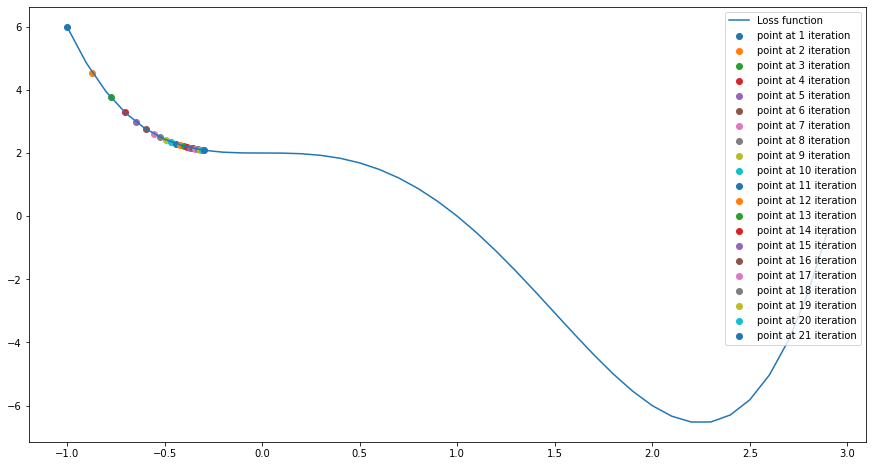

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple convex loss function with multiple local minima
def loss_function(x):
    return x**4 - 3*x**3 + 2

# Define the derivative of the loss function
def gradient(x):
    return 4*x**3 - 9*x**2

# Gradient Descent function
def gradient_descent(gradient_fn, initial_x, learning_rate, num_iterations):
    # implement gradient_descent

    history = [initial_x]
    for i in range(num_iterations):
        new_x = history[-1] - learning_rate * gradient_fn(history[-1])
        history.append(new_x)
    return history

# Visualize the function
plt.figure(figsize=(15, 8))
X = np.arange(-1, 3, 0.1)
plt.plot(X, loss_function(X), label = 'Loss function')

# Run gradient descent with different initializations and plot the points that gradient descent finds them to be optimal minima

history = gradient_descent(gradient, -1, 10**-2, 20)
for i in range(len(history)):
    plt.scatter(history[i], loss_function(history[i]), label = f'point at {i + 1} iteration')
plt.legend(loc = 'best')


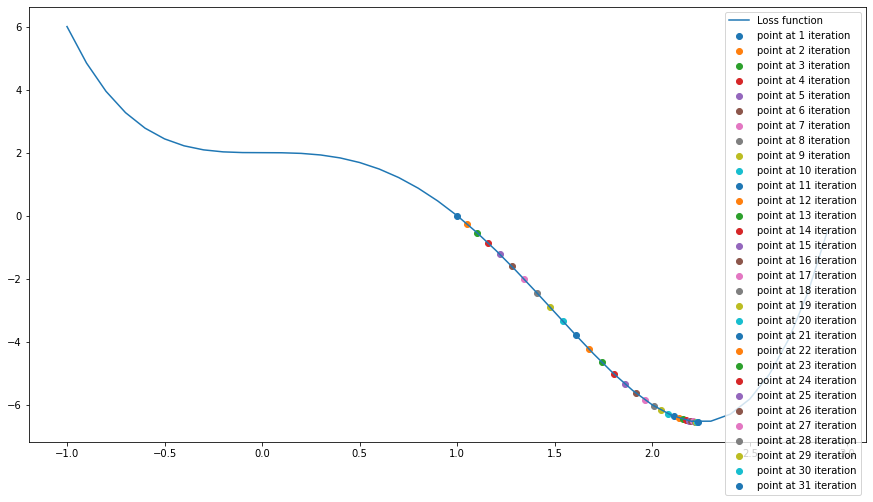

In [29]:
# Visualize the function
plt.figure(figsize=(15, 8))
X = np.arange(-1, 3, 0.1)
plt.plot(X, loss_function(X), label = 'Loss function')

# Run gradient descent with different initializations and plot the points that gradient descent finds them to be optimal minima

history = gradient_descent(gradient, 1, 10**-2, 30)
for i in range(len(history)):
    plt.scatter(history[i], loss_function(history[i]), label = f'point at {i + 1} iteration')
plt.legend(loc = 'best')

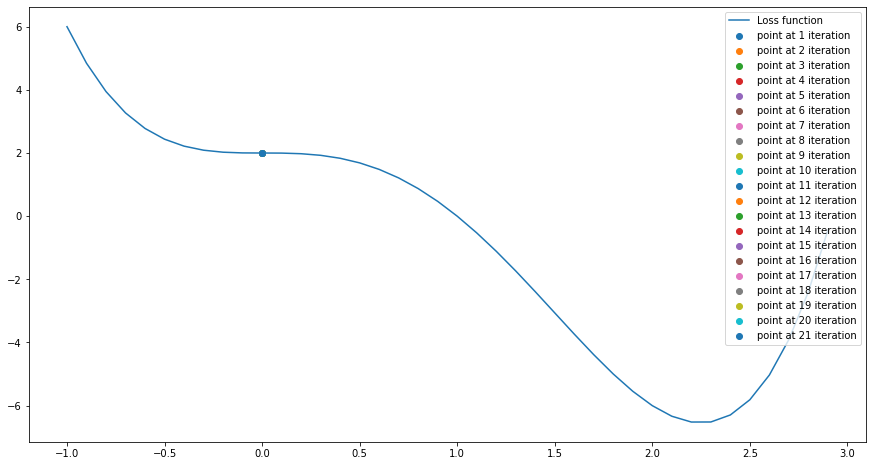

In [30]:
# Visualize the function
plt.figure(figsize=(15, 8))
X = np.arange(-1, 3, 0.1)
plt.plot(X, loss_function(X), label = 'Loss function')

# Run gradient descent with different initializations and plot the points that gradient descent finds them to be optimal minima

history = gradient_descent(gradient, 0, 10**-2, 20)
for i in range(len(history)):
    plt.scatter(history[i], loss_function(history[i]), label = f'point at {i + 1} iteration')
plt.legend(loc = 'best')

## Question :
Does gradient descent converges to the optimum solution or not in this example ?
Does gradient descent always converges to the optimum solution ? under what circumstances gradient descent converges ?

The gradient descent algorithm doesn't always converge to the optimum solution. In fact, the convergance is dependant on the initialization point. The starting point should be initialized in a way that the currect point during the algorithm doesn't reach to a range of function which its derivative (or gradient) equals to zero because in that case, the current point remains the same and it doesn't converge to the optimum point. Therefore, the initialization point should be placed sufficiently near to the optimum point.